# Import Data Libraries 


In [2]:
import pandas as pd 
!pip install pyarrow

import ipywidgets
from ipywidgets import interactive, fixed, interact, Dropdown

  Using cached pyarrow-7.0.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)


In [3]:
!pip install -r requirements.txt
import numpy as np
import sys
!pip install eep153-tools
!pip install gspread-pandas

from eep153_tools.sheets import read_sheets
import cfe

  Using cached CFEDemands-0.4.1-py2.py3-none-any.whl (39 kB)
  Using cached ConsumerDemands-0.3.dev0-py2.py3-none-any.whl (12 kB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Using cached eep153_tools-0.11-py2.py3-none-any.whl (4.4 kB)
Processing /home/jovyan/.cache/pip/wheels/20/7e/30/7d702acd6a1e89911301cd9dbf9cb9870ca80c0e64bc2cde23/gnupg-2.3.1-py3-none-any.whl
Missing dependencies for OracleDemands.


# [A] Population, and Supporting Expenditure Data

### Parquet Files Cleaning & DataFrame Establishment

We acquired our data from the Indian National Sample Survey (NSS). These original parque files contain data from a very large pool of households from 35 states; the following parts establish dataframes for our choosen Maharashtra population.

In [4]:
#food expenditure in Rupee
food_price = pd.read_parquet('x.parquet', engine = 'pyarrow').unstack('i')
food_price

total_value                                                \
i                         apple arhar (tur) baby food bajra & products banana   
j         Frequency                                                             
410001101 Monthly          20.0       121.0       NaN              NaN    NaN   
410001102 Monthly         160.0        60.0       NaN             40.0   60.0   
410001103 Monthly          40.0       195.0       NaN              NaN   50.0   
410001201 Monthly          40.0       130.0       NaN              NaN   20.0   
410001202 Monthly           NaN        65.0       NaN              NaN    NaN   
...                         ...         ...       ...              ...    ...   
799981301 Monthly           NaN         NaN       NaN              NaN    NaN   
799982101 Monthly           NaN         NaN       NaN              NaN    NaN   
799982201 Monthly           NaN         NaN       NaN              NaN    NaN   
799982202 Monthly           NaN         NaN       NaN              NaN    NaN   
799982301 Monthly           NaN         NaN       NaN              NaN    NaN   

                                                                ...        \
i                   barley & products beef beer berries  besan  ... toddy   
j         Frequency                                             ...         
410001101 Monthly                 NaN  NaN  NaN     NaN  120.0  ...   NaN   
410001102 Monthly                 NaN  NaN  NaN     NaN   15.0  ...   NaN   
410001103 Monthly                 NaN  NaN  NaN     NaN   60.0  ...   NaN   
410001201 Monthly                 NaN  NaN  NaN     NaN   90.0  ...   NaN   
410001202 Monthly                 NaN  NaN  NaN     NaN   60.0  ...   NaN   
...                               ...  ...  ...     ...    ...  ...   ...   
799981301 Monthly                 NaN  NaN  NaN     NaN    NaN  ...   NaN   
799982101 Monthly                 NaN  NaN  NaN     NaN    NaN  ...   NaN   
799982201 Monthly                 NaN  NaN  NaN     NaN    NaN  ...   NaN   
799982202 Monthly                 NaN  NaN  NaN     NaN    NaN  ...   NaN   
799982301 Monthly                 NaN  NaN  NaN     NaN    NaN  ...   NaN   

                                                                       \
i                   tomato turmeric   urd vanaspati, margarine walnut   
j         Frequency                                                     
410001101 Monthly     50.0      7.0   NaN                  NaN    NaN   
410001102 Monthly     12.0     20.0  15.0                  NaN   90.0   
410001103 Monthly     50.0     12.0   NaN                  NaN    NaN   
410001201 Monthly     36.0     33.0   NaN                  NaN  153.0   
410001202 Monthly     30.0     10.0   NaN                  NaN    NaN   
...                    ...      ...   ...                  ...    ...   
799981301 Monthly     30.0     20.0   NaN                  NaN    NaN   
799982101 Monthly     40.0     63.0  60.0                  NaN    NaN   
799982201 Monthly     30.0     63.0  60.0                  NaN    NaN   
799982202 Monthly     20.0     63.0  60.0                  NaN    NaN   
799982301 Monthly     30.0     75.0  60.0                  NaN    NaN   

                                                                               \
i                   watermelon wheat/atta - P.D.S. wheat/atta - other sources   
j         Frequency                                                             
410001101 Monthly          NaN                 NaN                      720.0   
410001102 Monthly          NaN                 NaN                      180.0   
410001103 Monthly          NaN                 NaN                      600.0   
410001201 Monthly          NaN                 NaN                      350.0   
410001202 Monthly          NaN                 NaN                      220.0   
...                        ...                 ...                        ...   
799981301 Monthly          NaN                 NaN    

In [5]:
#food quantity 
food_quant = pd.read_parquet('q.parquet', engine = 'pyarrow').reset_index()
food_quant

,j,i,unit,Frequency,total_quantity
0,410001101,apple,kg,Monthly,250.0
1,410001101,arhar (tur),kg,Monthly,2000.0
2,410001101,besan,kg,Monthly,2000.0
3,410001101,black pepper,gm,Monthly,20.0
4,410001101,brinjal,kg,Monthly,5000.0
...,...,...,...,...,...
4423639,799982301,tomato,kg,Monthly,3000.0
4423640,799982301,turmeric,gm,Monthly,300.0
4423641,799982301,urd,kg,Monthly,1000.0
4423642,799982301,wheat/atta - P.D.S.,kg,Monthly,10000.0


In [6]:
#nutritional content
nutritient = pd.read_parquet('n.parquet', engine = 'pyarrow')
nutritient

,calories per unit(kcal),fat per unit(gm),i,protein per unit(gm),rural,t,unit
1,3280.000000,13.00,ragi,73.00,NaN,50,kg
4,1100.000000,2.00,other cereal subs.,16.00,NaN,50,kg
5,3420.000000,36.00,maize-other sources,111.00,NaN,50,kg
7,3420.000000,36.00,maize - pds,111.00,NaN,50,kg
8,3360.000000,13.00,barley,115.00,NaN,50,kg
...,...,...,...,...,...,...,...
145,24.700001,0.95,other served processed food,0.70,0.0,68,Re
146,21.100000,0.85,"cake, pastry, prepared sweets",0.20,0.0,68,Re
147,28.500000,0.17,"biscuits, chocolates",0.35,0.0,68,Re
148,24.700001,0.95,"papad, bhujia, namkeen, mixture, chanachur",0.70,0.0,68,Re


In [7]:
# age-sex composition
pop = pd.read_parquet('z.parquet', engine = 'pyarrow')
pop

k,rural,m,religion,social group,Males 0-1,Males 1-5,Males 5-10,Males 10-15,Males 15-20,Males 20-30,...,Males 60-100,Females 0-1,Females 1-5,Females 5-10,Females 10-15,Females 15-20,Females 20-30,Females 30-50,Females 50-60,Females 60-100
j,,,,,,,,,,,,,,,,,,,,,
410001101,Urban,Gujarat,Hinduism,Other backward class,0,0,0,0,0,2,...,0,0,0,0,0,0,1,1,0,0
410001102,Urban,Gujarat,Christianity,Others,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
410001103,Urban,Gujarat,Hinduism,Others,0,0,0,0,0,3,...,0,0,0,0,0,0,0,1,0,0
410001201,Urban,Gujarat,Christianity,Others,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
410001202,Urban,Gujarat,Hinduism,Others,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799981301,Rural,Jammu & Kashmir,Hinduism,Others,0,0,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
799982101,Rural,Jammu & Kashmir,Hinduism,Others,0,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
799982201,Rural,Jammu & Kashmir,Hinduism,Others,0,0,0,1,2,0,...,0,0,0,0,1,0,0,1,0,1


In [8]:
#total household expenditure in Rupee
expenditure = pd.read_parquet('total_expenditures.parquet', engine = 'pyarrow')
expenditure

,total_value
j,
410001101,7813
410001102,3573
410001103,9359
410001201,5671
410001202,6169
...,...
799981301,3842
799982101,2736
799982201,3378


In [42]:
pop.info()
pop.religion.value_counts()
#from the output, we can see that Maharashtra has the second most data points (8043 households)
#so, this would further insure the validity of our following estimation

<class 'pandas.core.frame.DataFrame'>
Index: 101662 entries, 410001101 to 799982301
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   rural           101662 non-null  object
 1   m               101662 non-null  object
 2   religion        101659 non-null  object
 3   social group    101648 non-null  object
 4   Males 0-1       101662 non-null  int64 
 5   Males 1-5       101662 non-null  int64 
 6   Males 5-10      101662 non-null  int64 
 7   Males 10-15     101662 non-null  int64 
 8   Males 15-20     101662 non-null  int64 
 9   Males 20-30     101662 non-null  int64 
 10  Males 30-50     101662 non-null  int64 
 11  Males 50-60     101662 non-null  int64 
 12  Males 60-100    101662 non-null  int64 
 13  Females 0-1     101662 non-null  int64 
 14  Females 1-5     101662 non-null  int64 
 15  Females 5-10    101662 non-null  int64 
 16  Females 10-15   101662 non-null  int64 
 17  Females 15-20   101662 

Hinduism          77062
Islam             13136
Christianity       7070
Sikhism            2016
Buddhism           1094
Others              956
Jainism             322
Zoroastrianism        3
Name: religion, dtype: int64

### **Here are some helper functions to extrapolate data for the chosen population from the larger raw dataframe**

The `filter_pop` function takes a raw dataframe and households characteristics as arguments and returns a `DataFrame` for the choosen population segement. The optional arguemnts help if you want to target specific demographic groups in the choosen state

**Input Parameters:**

- **df**: the name of the raw population df you want to extrapolate from
- **state**: an str (any state name from the 35 states)
- **rural**: optional; an str ('Rural' or 'Urban')
- **religion**: optional; an str ('Hinduism', 'Islam', 'Christianity', 'Sikhism', 'Buddhism', 'Others',             'Jainism', or 'Zoroastrianism')

In [11]:
def filter_pop(df, state, rural = None, religion = None):
    new = df.loc[df['m'] == state]
    if rural != None:
        new = new.loc[new['rural'] == rural]
    if religion != None:
        new= new.loc[new['religion'] == religion]
    return new
    

The `get_id` function takes a raw dataframe and households characteristics as arguments, uses the `filter_pop` function, and  returns a list of household IDs for the chosen population

**Input Parameters:**

- **df**: the raw df you want to extrapolate from
- **state**: an str (any state name from the 35 states)
- **rural**: optional; an str ('Rural' or 'Urban')
- **religion**: optional; an str ('Hinduism', 'Islam', 'Christianity', 'Sikhism', 'Buddhism', 'Others',             'Jainism', or 'Zoroastrianism')

In [12]:
def get_id(df, state, rural = None, religion = None):
    ids = filter_pop(df = pop, state = state, rural = rural, religion = religion).index
    return ids

The `match_info` function takes a raw dataframe and household_ids and returns a sliced df for the particular selected households

**Input Parameters:**

- **ids**: list of column ids
- **df**: the raw df you want to extrapolate from

In [13]:
def match_info(ids, df):
    n = df.reset_index()
    new = n[n['j'].isin(ids)]
    return new

# [A] Estimate Demand System

**Establish and format DataFrames for the chosen population: Surveyed Households from the state of Maharashtra, India**

In [14]:
maharashtra_id =get_id(df = pop, state = 'Maharashtra')
maharashtra_id

Index(['421001201', '421001202', '421001203', '421001204', '421002201',
       '421002202', '421002203', '421002204', '421011101', '421011102',
       ...
       '756982202', '756982301', '756991101', '756991102', '756991201',
       '756991202', '756991203', '756991204', '756991301', '756991302'],
      dtype='object', name='j', length=8043)

In [15]:
maha_food_quant = match_info(maharashtra_id, food_quant) 
maha_food_quant

,index,j,i,unit,Frequency,total_quantity
332920,332920,421001201,arhar (tur),kg,Monthly,1000.0
332921,332921,421001201,besan,kg,Monthly,500.0
332922,332922,421001201,"biscuits, chocolates",Re,Monthly,0.0
332923,332923,421001201,bread (bakery),kg,Monthly,1000.0
332924,332924,421001201,brinjal,kg,Monthly,1000.0
...,...,...,...,...,...,...
3494160,3494160,756991302,"suji, rawa",kg,Monthly,1000.0
3494161,3494161,756991302,tea : cups,no.,Monthly,20.0
3494162,3494162,756991302,tea : leaf,gm,Monthly,350.0
3494163,3494163,756991302,tomato,kg,Monthly,3500.0


In [16]:
maha_tol_exp = match_info(maharashtra_id, expenditure)
maha_tol_exp

,j,total_value
7577,421001201,4857
7578,421001202,5246
7579,421001203,2725
7580,421001204,4750
7581,421002201,5207
...,...,...
78734,756991202,2497
78735,756991203,2028
78736,756991204,2833
78737,756991301,3706


In [17]:
maha_food_exp = match_info(maharashtra_id, food_price)

maha_food_exp.drop('Frequency', inplace=True, axis=1) #drop unecessary columns
maha_food_exp.columns.name = 'i'
maha_food_exp.set_index('j')
maha_food_exp = maha_food_exp.groupby('i',axis=1).sum()
maha_food_exp = maha_food_exp.replace(0,np.nan) # Replace zeros with NaN
maha_food_exp.rename(columns={maha_food_exp.columns[-1] :'j'}, inplace=True)

# add the time 't' and market 'm' column
#since the data is from one year (2016) and one market (maharashtra), equate all to 1
maha_food_exp.insert(loc=165, column='t', value=1)
maha_food_exp.insert(loc=166, column='m', value=1)

# Take logs of expenditures and name the new df 'y'
y = np.log(maha_food_exp.set_index(['j','t','m']))
y

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,,i,apple,arhar (tur),baby food,bajra & products,banana,barley & products,beef,beer,berries,besan,...,toddy,tomato,turmeric,urd,"vanaspati, margarine",walnut,watermelon,wheat/atta - P.D.S.,wheat/atta - other sources,"zarda,kimam,surti"
j,t,m,,,,,,,,,,,,,,,,,,,,,
421001201,1,1,NaN,4.317488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.401197,...,NaN,3.912023,2.484907,NaN,NaN,NaN,NaN,NaN,5.991465,NaN
421001202,1,1,NaN,4.382027,NaN,NaN,4.248495,NaN,NaN,NaN,NaN,3.401197,...,NaN,3.912023,2.484907,NaN,NaN,NaN,NaN,NaN,4.787492,NaN
421001203,1,1,NaN,NaN,NaN,NaN,2.890372,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421001204,1,1,NaN,NaN,NaN,NaN,3.555348,NaN,NaN,NaN,NaN,3.401197,...,NaN,3.912023,2.484907,NaN,NaN,NaN,NaN,NaN,6.173786,NaN
421002201,1,1,NaN,4.317488,NaN,NaN,3.555348,NaN,NaN,NaN,NaN,3.401197,...,NaN,3.912023,2.484907,NaN,NaN,NaN,NaN,NaN,5.991465,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756991202,1,1,NaN,3.401197,NaN,NaN,3.688879,NaN,NaN,NaN,2.484907,NaN,...,NaN,3.555348,2.890372,NaN,NaN,NaN,NaN,NaN,4.941642,NaN
756991203,1,1,NaN,4.700480,NaN,NaN,NaN,NaN,NaN,NaN,2.564949,NaN,...,NaN,2.484907,2.484907,NaN,NaN,NaN,NaN,3.688879,NaN,NaN
756991204,1,1,NaN,4.828314,NaN,NaN,NaN,NaN,NaN,NaN,2.708050,NaN,...,NaN,1.791759,2.890372,NaN,NaN,NaN,NaN,5.075174,NaN,NaN


In [18]:
maha_pop = match_info(maharashtra_id, pop) 
maha_pop

# add the time 't' and market 'm' column
#since the data is from one year (2016) and one market (maharashtra), equate all to 1
maha_pop['m'] = 1
maha_pop['t'] = 1
maha_pop.columns.name = 'k'
maha_pop.set_index(['j','t','m'],inplace=True)
maha_pop.drop(maha_pop.columns[0:3], inplace=True, axis=1) #drop unecessary columns

# calculate and add new column 'log Hsize'
maha_pop['log Hsize'] = np.log(maha_pop.sum(axis=1).values)
maha_pop

,,k,Males 0-1,Males 1-5,Males 5-10,Males 10-15,Males 15-20,Males 20-30,Males 30-50,Males 50-60,Males 60-100,Females 0-1,Females 1-5,Females 5-10,Females 10-15,Females 15-20,Females 20-30,Females 30-50,Females 50-60,Females 60-100,log Hsize
j,t,m,,,,,,,,,,,,,,,,,,,
421001201,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1.386294
421001202,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1.098612
421001203,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
421001204,1,1,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,0,0,1.386294
421002201,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756991202,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.693147
756991203,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.693147
756991204,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1.386294


## Estimation 
### **1.First step:**
Recall that there are two steps to estimation; the first step
involves estimating the &ldquo;reduced form&rdquo; linear regression 
$$
y_{it}^j = {a}_{it} + \delta_i'{z}^j_t + \epsilon_{it}^j.
$$


In [19]:
result = cfe.Result(y=y,z=maha_pop)

This creates a complicated &ldquo;Result&rdquo; object, with lots of different attributes.  Note from below that attributes $y$ and $z$ are now defined.

In [20]:
result

<xarray.Result>
Dimensions:           (k: 19, j: 8043, t: 1, m: 1, i: 103)
Coordinates:
  * j                 (j) object '421001201' '421001202' ... '756991302'
  * t                 (t) int64 1
  * m                 (m) int64 1
  * i                 (i) <U50 'apple' ... 'wheat/atta - other sources'
  * k                 (k) <U14 'Males 0-1' 'Males 1-5' ... 'log Hsize'
Data variables: (12/20)
    alpha             object None
    beta              object None
    delta             object None
    prices            object None
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.386 1.609 1.609
    loglambdas        object None
    ...                ...
    se_beta           object None
    se_alpha          object None
    se_a              object None
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan nan
    logp              object None
    z                 (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.386 1.609 1.609
Attributes:
    firstround:            1
    min_proportion_items:  0.125
    min_xproducts:         30
    all_tm:                True
    common_alpha:          True
    useless_expenditures:  False
    stderr_tol:            0.01
    indices:               Indices(j='j', t='t', m='m', i='i', k='k')
    iterate:               False
    verbose:               False

In [44]:
#the Result class has code to estimate the "reduced form" in one line:
result.get_reduced_form()

/opt/conda/lib/python3.9/site-packages/cfe/estimation.py:425: UserWarning: No variation in: (1, 1)
  warnings.warn("No variation in: %s" % str(constant))


After running this we can examine the estimated coefficients $\delta$:

In [22]:
result.delta.to_dataframe().unstack('k')

delta                                   \
k                          Males 0-1 Males 1-5 Males 5-10 Males 10-15   
i                                                                       
apple                       0.116241 -0.010087  -0.016225    0.042034   
arhar (tur)                -0.023166 -0.038610  -0.012056    0.004052   
bajra & products            0.252834 -0.010578   0.042047    0.071540   
banana                     -0.025035 -0.032487  -0.016979    0.010445   
besan                      -0.073333 -0.018965   0.036798    0.001278   
...                              ...       ...        ...         ...   
urd                         0.093142  0.039835   0.003065    0.024844   
vanaspati, margarine        0.166406  0.025756   0.048454    0.023660   
watermelon                  0.109513  0.093756   0.096730    0.033754   
wheat/atta - P.D.S.        -0.053065 -0.129640  -0.060660   -0.009596   
wheat/atta - other sources -0.091201 -0.073899  -0.066786    0.006375   

                                                                            \
k                          Males 15-20 Males 20-30 Males 30-50 Males 50-60   
i                                                                            
apple                         0.025789    0.072390    0.185028    0.152401   
arhar (tur)                   0.023918    0.061794    0.095395    0.091041   
bajra & products              0.075980    0.164270    0.045495    0.089150   
banana                        0.022264    0.067411    0.131955    0.091155   
besan                         0.024174    0.085924    0.085044    0.100227   
...                                ...         ...         ...         ...   
urd                           0.053146    0.083538    0.066379    0.026303   
vanaspati, margarine         -0.034821    0.101674    0.074322    0.152296   
watermelon                    0.091002    0.080101    0.006049    0.032390   
wheat/atta - P.D.S.           0.041966   -0.045329   -0.067712   -0.085848   
wheat/atta - other sources   -0.028890    0.013290    0.096776    0.101193   

                                                                              \
k                          Males 60-100 Females 0-1 Females 1-5 Females 5-10   
i                                                                              
apple                          0.118404   -0.162462   -0.076575    -0.019229   
arhar (tur)                    0.096935   -0.068099   -0.027607    -0.015911   
bajra & products               0.175357   -0.000809    0.069898     0.009602   
banana                         0.082210   -0.155635   -0.040476    -0.004479   
besan                          0.111893   -0.038423   -0.014972     0.017186   
...                                 ...         ...         ...          ...   
urd                            0.099115   -0.208499    0.076770     0.034536   
vanaspati, margarine           0.219197   -0.119702    0.006907    -0.001839   
watermelon                     0.097625   -0.337457    0.001415    -0.051143   
wheat/atta - P.D.S.           -0.069854    0.088620   -0.068748    -0.027994   
wheat/atta - other sources     0.056519   -0.172308   -0.099878    -0.047127   

                                                                      \
k                          Females 10-15 Females 15-20 Females 20-30   
i                                                                      
apple                          -0.009279      0.008302      0.077328   
arhar (tur)                     0.015115      0.021287      0.019158   
bajra & products                0.132038      0.069990     -0.129314   
banana                          0.028419      0.025601      0.071600   
besan                           0.014448      0.027082      0.064938   
...                                  ...           ...           ...   
urd                             0.003487      0.084573      0.048963   
vanaspati, margarine           -0.002745      0.067961      0.138426   
wa

Also the good-time constants $a_{it}$ (this captures the effects of prices):

However, in our data, we only have data from 1 year, so the time factor is mostly irrelevant; this won't create a problem in our estimation because although we only have 1 year, the data is from a large pool of households (8043 j values)

In [23]:
result.a.to_dataframe().unstack('i')


a                                                  \
i       apple arhar (tur) bajra & products    banana    besan   
t m                                                             
1 1  4.337676    3.689784         3.436197  3.184263  2.69299   

                                                                          ...  \
i   biscuits, chocolates black pepper bread (bakery)   brinjal   cabbage  ...   
t m                                                                       ...   
1 1             3.432596     1.979749       3.462497  2.353381  2.359734  ...   

                                                                   \
i    tamarind tea : cups tea : leaf    tomato  turmeric       urd   
t m                                                                 
1 1  1.541942   4.264725    3.25763  2.524024  2.177102  2.958252   

                                                         \
i   vanaspati, margarine watermelon wheat/atta - P.D.S.   
t m                                                       
1 1              2.74631   3.310748            3.511203   

                                
i   wheat/atta - other sources  
t m                             
1 1                   4.493328  

[1 rows x 103 columns]

### 2.Second step:

The second step involves using Singular Value Decomposition to find
the rank one matrix that best approximates the residuals $e_{it}^j$.
This can be interpreted as
$$
    -\beta_i\log\lambda^j_t,
$$
where the $\log\lambda^j_t$ is the log of the marginal utility of
expenditures (MUE) for household $j$ at time $t$, and where $\beta_i$ are
the corresponding &ldquo;Frisch elasticities&rdquo; that tell us how much
demand changes as the MUE falls.

Estimates can also be computed as a one-liner:



In [24]:
result.get_beta(as_df=True)

i
apple                         0.451570
arhar (tur)                   0.177062
bajra & products             -0.085787
banana                        0.329504
besan                         0.171622
                                ...   
urd                           0.155062
vanaspati, margarine          0.243740
watermelon                    0.256393
wheat/atta - P.D.S.           0.057134
wheat/atta - other sources    0.116349
Name: beta, Length: 103, dtype: float64

### 3. Assessment of Fit


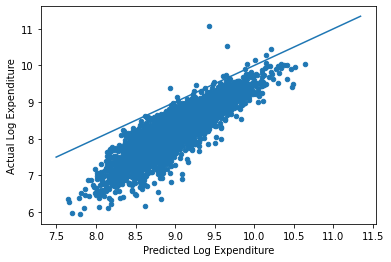

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual Log Expenditure':np.log(xbar),'Predicted Log Expenditure':np.log(xhat)})

df.plot.scatter(x='Predicted Log Expenditure',y='Actual Log Expenditure')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

In [47]:
#save estimate result in datahub
result.to_dataset('maharashtra.ds')

<xarray.Dataset>
Dimensions:           (j: 8043, i: 103, k: 19, t: 1, m: 1, kp: 19)
Coordinates:
  * j                 (j) object '421001201' '421001202' ... '756991302'
  * t                 (t) int64 1
  * m                 (m) int64 1
  * i                 (i) <U50 'apple' ... 'wheat/atta - other sources'
  * k                 (k) <U14 'Males 0-1' 'Males 1-5' ... 'log Hsize'
  * kp                (kp) <U14 'Males 0-1' 'Males 1-5' ... 'log Hsize'
Data variables: (12/20)
    alpha             object None
    beta              (i) float64 0.4516 0.1771 -0.08579 ... 0.05713 0.1163
    delta             (k, i) float64 0.1162 -0.02317 0.2528 ... 0.6224 0.7358
    prices            object None
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.386 1.609 1.609
    loglambdas        (j, t, m) float64 -1.296 -1.244 nan ... 0.9579 0.2482
    ...                ...
    se_beta           object None
    se_alpha          object None
    se_a              (i, t, m) float64 0.01268 0.006409 ... 0.01508 0.006408
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan nan
    logp              object None
    z                 (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.386 1.609 1.609

### 4. Infer Prices


In [48]:
# Estimates most things (not counting std errors for betas).
xhat = result.get_predicted_expenditures(as_df = True) 
result.get_beta(as_df=True).sort_values(ascending=False).tail(30) # Check sanity...

i
groundnut                                             0.138778
chillis (green)                                       0.135773
chira                                                 0.129129
refined oil [sunflower, soyabean, saffola, etc.]      0.123606
ingredients for pan                                   0.121903
oilseeds                                              0.121774
turmeric                                              0.116570
wheat/atta - other sources                            0.116349
suji, rawa                                            0.113621
jeera                                                 0.112667
other pulses                                          0.109483
garlic                                                0.108950
cereal substitutes  (tapioca, jackfruit seed etc.)    0.106252
lpg                                                   0.103953
kerosene-pds                                          0.092297
jowar & products                                     

In [33]:
xhat

,,i,apple,arhar (tur),bajra & products,banana,besan,"biscuits, chocolates",black pepper,bread (bakery),brinjal,cabbage,...,tamarind,tea : cups,tea : leaf,tomato,turmeric,urd,"vanaspati, margarine",watermelon,wheat/atta - P.D.S.,wheat/atta - other sources
j,t,m,,,,,,,,,,,,,,,,,,,,,
421001201,1,1,155.764284,136.298187,79.535101,60.900000,39.677284,133.857843,18.543350,69.585119,33.001228,29.901528,...,13.075190,173.917870,85.717702,45.740792,21.545781,50.013998,42.661250,63.400058,86.127012,321.098923
421001202,1,1,161.288050,116.774955,73.359981,60.288393,36.532337,112.739126,17.467538,59.847131,32.604835,28.903597,...,11.903499,183.606696,86.314146,44.043984,19.779062,47.874941,37.990202,51.470185,74.296584,273.729379
421001204,1,1,150.780726,132.287215,84.336430,61.225979,40.647621,101.944674,16.652758,63.723065,33.544493,29.834996,...,9.797168,135.699317,93.343549,48.269043,22.773152,49.822855,37.131919,45.119294,89.077707,333.053121
421002201,1,1,154.981870,130.251596,82.364117,60.336993,39.478636,110.866183,16.897120,65.505165,32.925513,29.247491,...,10.742307,147.191275,89.510005,44.609439,21.362001,50.404020,38.550561,52.700330,80.655235,325.790704
421002202,1,1,131.668819,133.504481,89.331760,57.264063,37.238290,117.003045,18.598272,61.101826,33.360597,28.998293,...,14.228725,181.182300,88.049755,44.398451,21.523375,55.080154,39.277363,51.336739,90.324835,299.483598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756991202,1,1,58.779462,64.247291,61.870750,26.620794,21.066255,29.174252,8.253264,30.887101,15.755993,13.207945,...,5.962970,72.018161,39.495303,16.965073,13.259132,27.765980,20.722709,27.490799,59.198983,169.015001
756991203,1,1,45.399259,56.314497,82.701845,21.184194,20.042832,21.155324,7.115237,27.142407,13.143445,9.846923,...,4.445194,43.726921,33.918227,12.381278,11.789077,26.296945,18.577361,25.099977,54.439858,148.898520
756991204,1,1,29.924709,74.171263,108.505533,18.431859,21.400973,19.424488,5.934119,25.510268,14.463000,10.261281,...,5.595908,46.415117,37.281221,14.383443,15.434831,25.642575,16.292197,16.561391,88.605238,194.419357
